# 題目1

第一小題:plot the observations

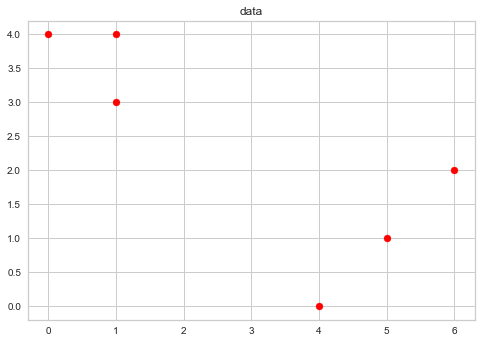

In [56]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

seed_num = 2
dot_num = 6

x=np.array([1,1,0,5,6,4])
y=np.array([4,3,4,1,2,0])
df=pd.DataFrame({'X1':x,'X2':y,'label':np.random.randint(0,2,6)})
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['X1'], df['X2'], color = 'red')
ax.set_title('data')
plt.show()

第二小題:report the cluster label

In [57]:
df

,X1,X2,label
0,1,4,1
1,1,3,1
2,0,4,0
3,5,1,0
4,6,2,0
5,4,0,1


第三小題:compute the centroid of each cluster

In [ ]:
centroid of cluster1_X=(1+1+4)/3
centroid of cluster1_y=(4+3+0)/3
centroid of cluster2_X=(0+5+6)/3
centroid of cluster2_y=(4+1+2)/3

第四小題:assign each observation to the centroid to which it is closeest

In [60]:
kx = np.random.randint(min(x), max(x)+1, seed_num)
ky = np.random.randint(min(y), max(y)+1, seed_num)

def dis(x, y, kx, ky):
    return (((kx - x) ** 2 + (ky - y) ** 2) ** 0.5)


def cluster(x, y, kx, ky):
    team = []
    x_team=[]
    y_team=[]
    for i in range(2):
        team.append([])
        x_team.append([])
        y_team.append([])

    mid_dis = 99999999
    for i in range(dot_num):
        for j in range(seed_num):
            distant = dis(x[i], y[i], kx[j], ky[j])
            if distant < mid_dis:
                mid_dis = distant
                flag = j
        team[flag].append([x[i], y[i]])
        x_team[flag].append(x[i])
        y_team[flag].append(y[i])
        mid_dis = 99999999
    return team,x_team,y_team


def re_seed(team, kx, ky):
    sumx = 0
    sumy = 0
    new_seed = []
    for index, nodes in enumerate(team):
        for node in nodes:
            sumx += node[0]
            sumy += node[1]
        new_seed.append([(sumx / len(nodes)), (sumy / len(nodes))])
        sumx = 0
        sumy = 0
    nkx = []
    nky = []
    for i in new_seed:
        nkx.append(i[0])
        nky.append(i[1])
    return nkx, nky

def kmeans(x, y, kx, ky):
    team,x_team,y_team = cluster(x, y, kx, ky)
    nkx, nky = re_seed(team, kx, ky)
    print(team)
    # plot: nodes connect to seeds
    


kmeans(x, y, kx, ky)

[[[1, 4], [1, 3], [0, 4], [4, 0]], [[5, 1], [6, 2]]]


第五小題:repeat c and d until the answers obtained stop changing

第六小題:coloring the observations according to the cluster labels obtained

[[[1, 4], [1, 3], [0, 4], [4, 0]], [[5, 1], [6, 2]]]


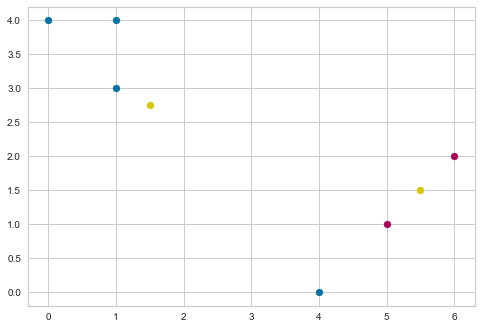

[[[1, 4], [1, 3], [0, 4]], [[5, 1], [6, 2], [4, 0]]]


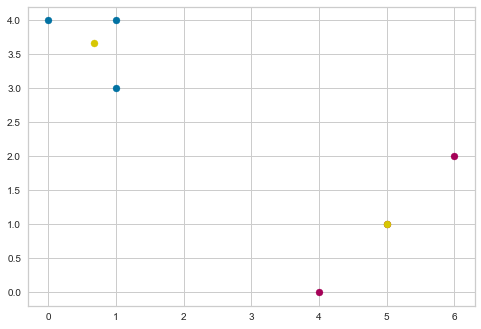

[[[1, 4], [1, 3], [0, 4]], [[5, 1], [6, 2], [4, 0]]]


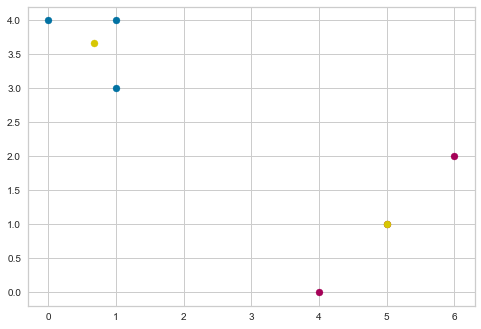

In [62]:
def kmeans(x, y, kx, ky, fig):
    team,x_team,y_team = cluster(x, y, kx, ky)
    nkx, nky = re_seed(team, kx, ky)
    print(team)
    feature1 = plt.scatter(x_team[0], y_team[0], c='b')
    feature2 = plt.scatter(x_team[1], y_team[1], c='m')


    #k_feature = plt.scatter(kx, ky,c='g')
    nk_feaure = plt.scatter(np.array(nkx), np.array(nky),c='y', s=50)
    plt.show()

    if nkx == list(kx) and nky == list(ky):
        return
    else:
        fig += 1
        kmeans(x, y, nkx, nky, fig)


kmeans(x, y, kx, ky, fig=0)

# 第二題

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('seeds_dataset.csv')
data

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,varieties
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
data.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,varieties
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [8]:
features=data.iloc[:,0:7]
target=data.iloc[:,-1]

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: varieties, Length: 210, dtype: int64

array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'perimeter'}>,
        <AxesSubplot:title={'center':'compactness'}>],
       [<AxesSubplot:title={'center':'length of kernel'}>,
        <AxesSubplot:title={'center':'width of kernel'}>,
        <AxesSubplot:title={'center':'asymmetry coefficient'}>],
       [<AxesSubplot:title={'center':'length of kernel groove'}>,
        <AxesSubplot:title={'center':'varieties'}>, <AxesSubplot:>]],
      dtype=object)

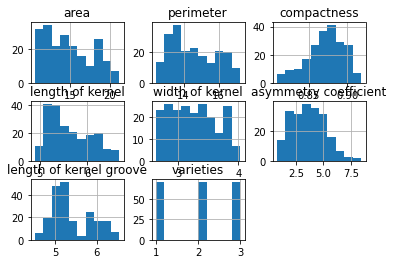

In [9]:
data.hist()

<Figure size 720x720 with 0 Axes>

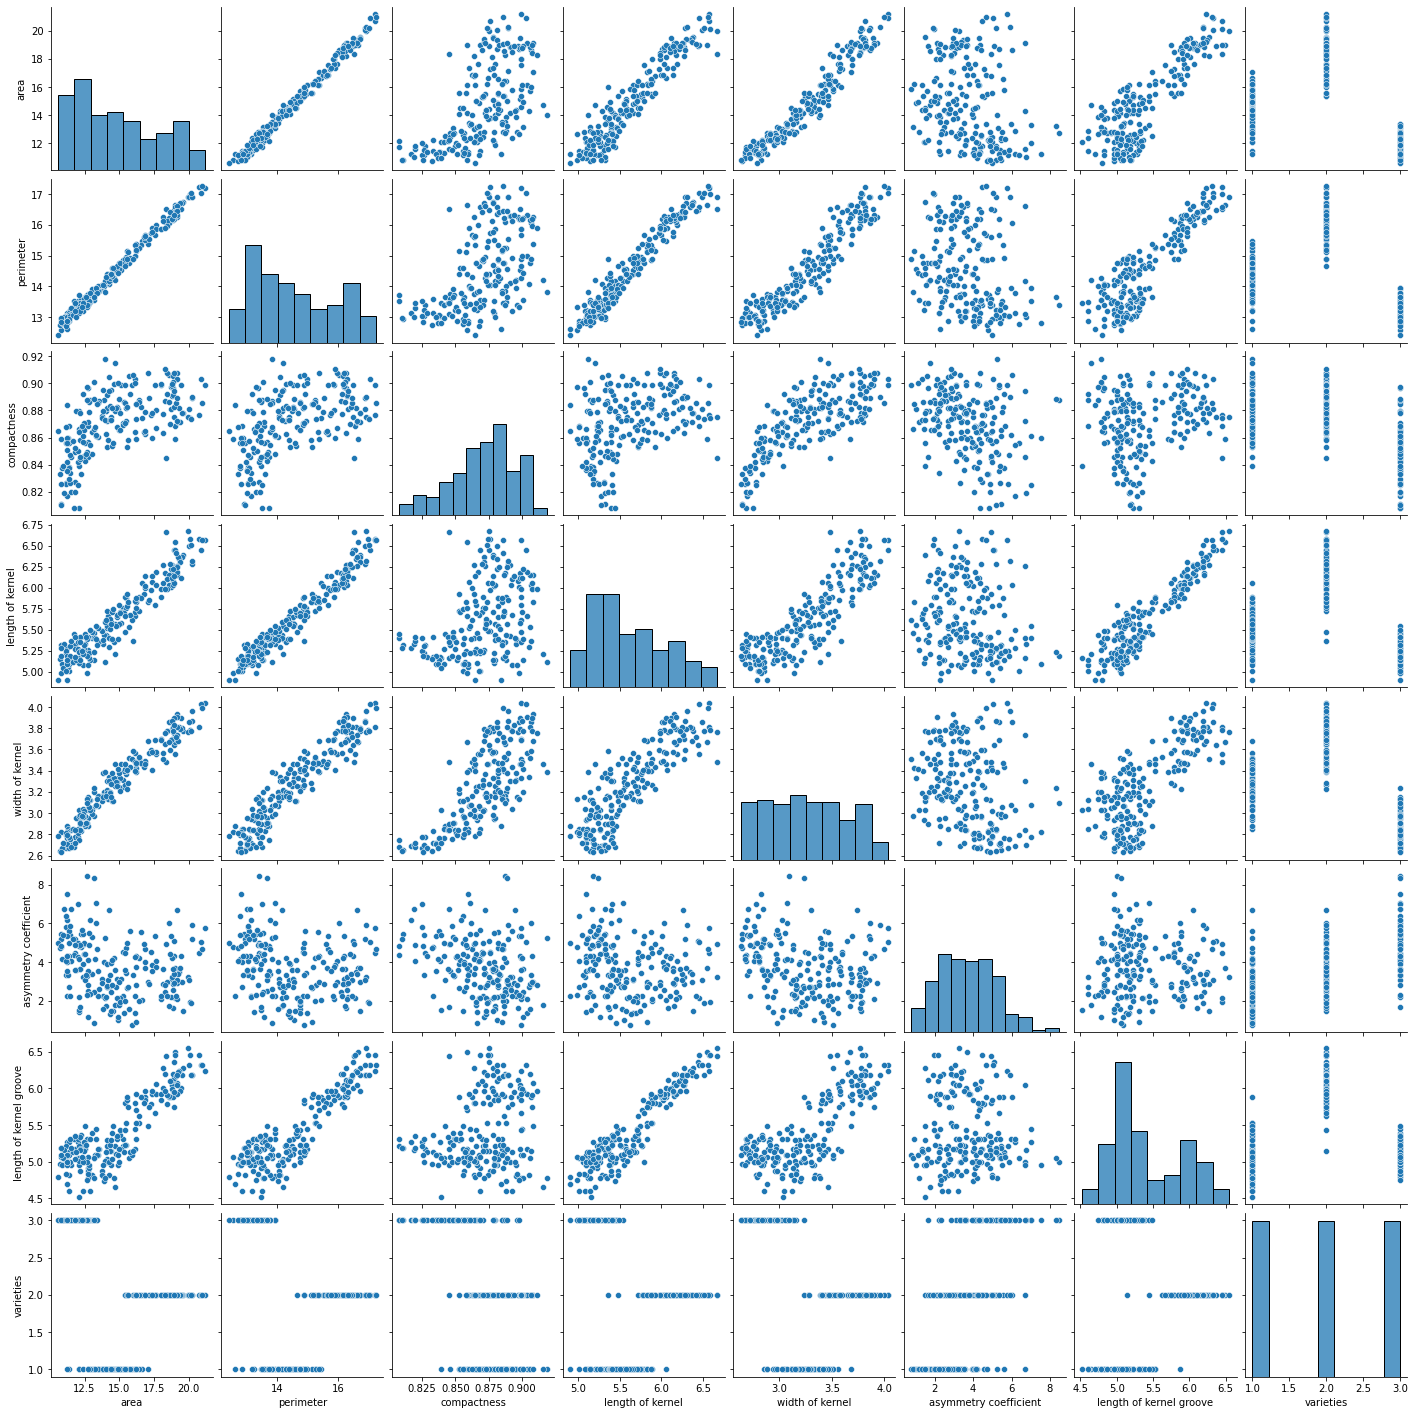

In [10]:
fig=plt.figure(figsize=(10,10))
fig.tight_layout()
sns.pairplot(data)
plt.show()

In [11]:
from sklearn.cluster import KMeans

In [14]:
!pip install yellowbrick

In [16]:
model=KMeans()
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


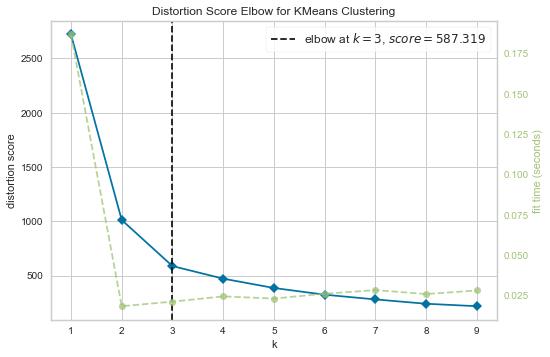

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
vis=KElbowVisualizer(model, k=(1,10))
vis.fit(features)
vis.poof()

In [21]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
cluster_labels = kmeans.fit_predict(features)
cluster_labels 

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
target

0      1
1      1
2      1
3      1
4      1
      ..
205    3
206    3
207    3
208    3
209    3
Name: varieties, Length: 210, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


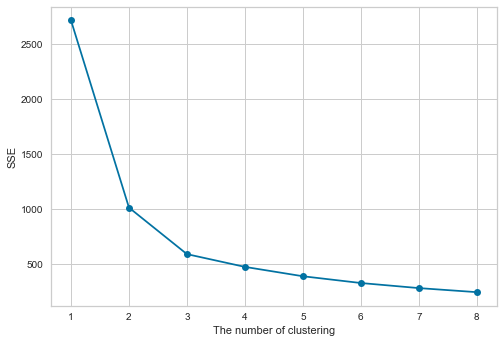

In [31]:
SSE=[]
for k in range(1,9):
    estimator=KMeans(n_clusters=k)
    estimator.fit(features)
    SSE.append(estimator.inertia_)
X=range(1,9)
plt.xlabel('The number of clustering')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

In [37]:
silhouettescore = metrics.silhouette_score(features, cluster_labels )
silhouettescore

0.4719337319126887

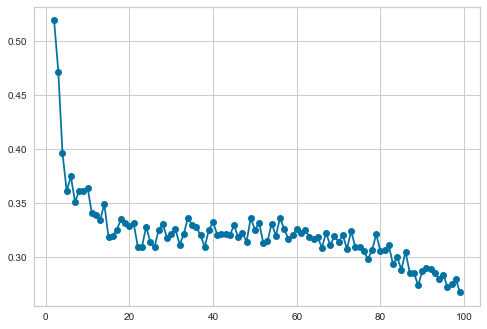

In [48]:
scores=[]
for i in range(2,100):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(features)
    cluster_labels = kmeans.fit_predict(features)
    scores.append(metrics.silhouette_score(features, cluster_labels ))
    
plt.plot(range(2,100),scores,marker='o')
plt.show()

結論:由於從SSE遞減圖和silhouettescore分數可看出n取2或3都可以，4以後分數便開始快速下降